# Johanes Andrian Kartono 03729894

<h3> Simulation Study II </h3>

<h5>Task 2.7.1</h5>
Create boxplots of the mean waiting times of a packet and the mean queue length (current
number of packets in buffer) for the system with a single server with µ = 0.0015 and a single
user with λ = 0.0015. Perform this simulation for queue capacity S = 5, 6, 7 and simulation
time of 100s. Run your simulation 1000 times and add the values to respective boxplots. You
should have one boxplot for the waiting times and one for the queue lengths, where the queue
capacity values correspond to the x-axis.

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


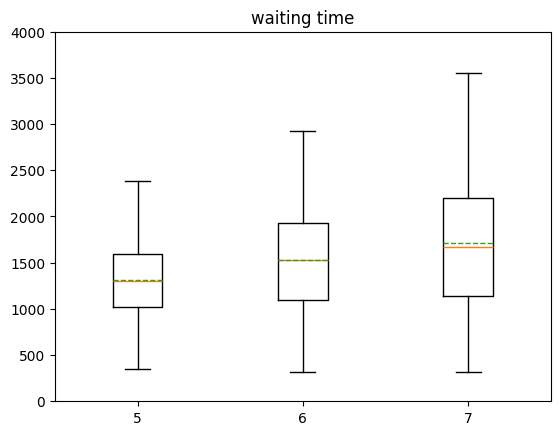

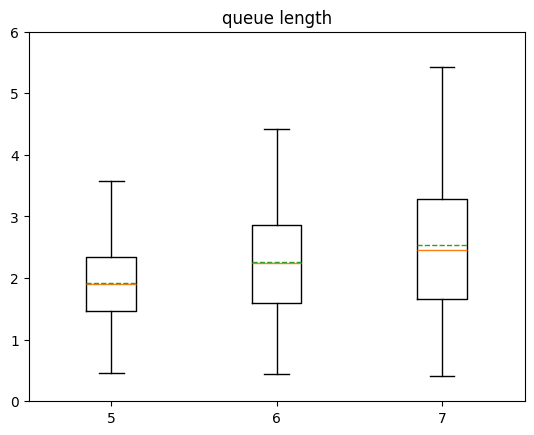

In [23]:
import simstudy2

simstudy2.task2_7_1([5,6,7])

<h5>Task 2.7.2</h5>
Create the same plots for a simulation time of 1000s. Still, the simulation has to run 1000
times. For easier comparison, you can set similar limits of values for the y-axis as in the task
2.7.1.

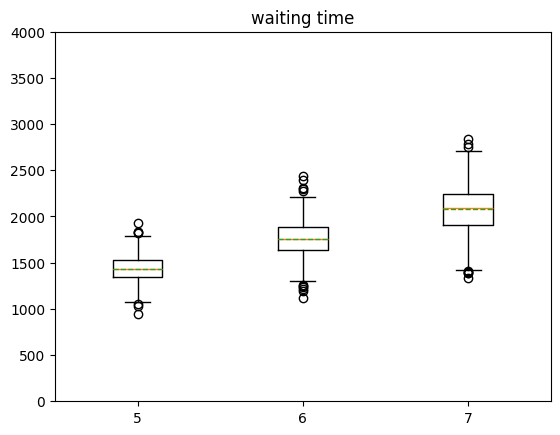

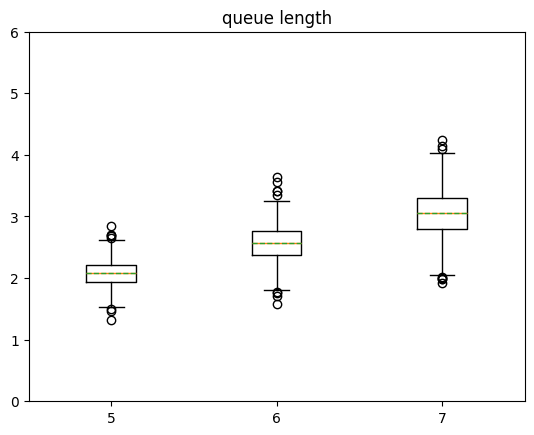

In [24]:
simstudy2.task2_7_2([5,6,7])

<h5>Task 2.7.3</h5>
Repeat the simulation study from tasks 2.7.1 and 2.7.2 with two servers, each of them having
the service rate µ = 0.00075. Other parameters should be the same as in the previous tasks.
Create the same boxplots. You should get in total 4 boxplots, 2 for a simulation time of 100s,
and 2 for a simulation time of 1000s.

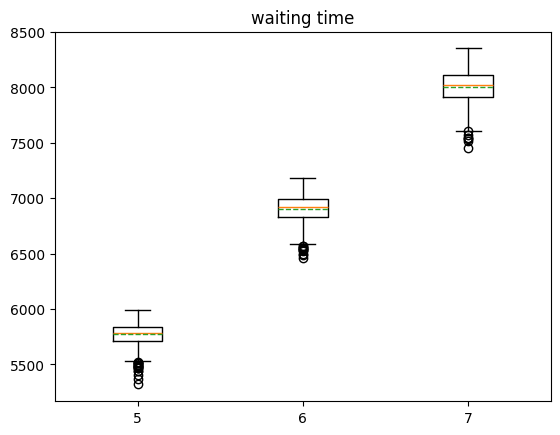

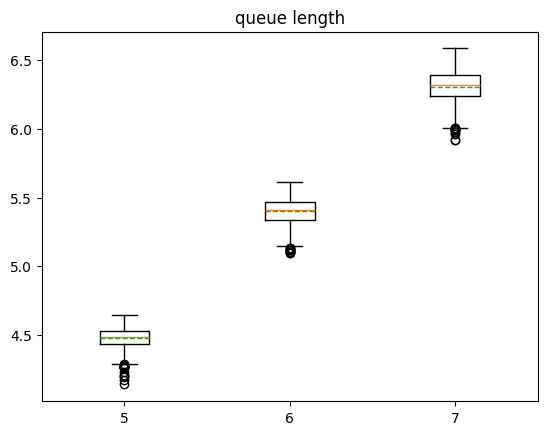

In [27]:
simstudy2.task2_7_3_1([5,6,7])

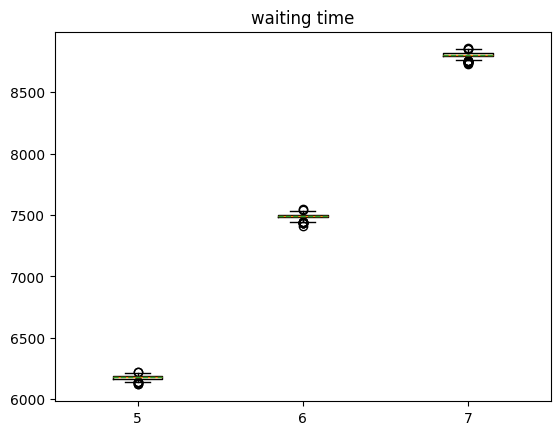

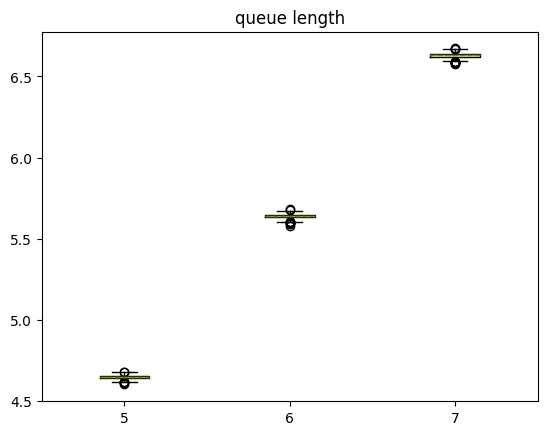

In [28]:
simstudy2.task2_7_3_2([5,6,7])

<h3> Analysis and General Questions </h3>

<h5>Task 2.8.1: Systems with Different Queue Capacity</h5>
Describe what you observe from the plots from tasks 2.7.1 and 2.7.2. What can you notice,
when you increase the queue capacity? What are the differences between a simulation time of
100s and 1000s, especially regarding the variance? Why does this effect happen?

When we increase the queue capacity, the average waiting time and the average queue length increase due to the increase in theoretical upper limit before a packet is dropped. We can also see that with increasing queue capacity, the interquantile range increase.

However the focus of this question should be more on the interquantile range/variance difference of the generated boxplot that is shown when we consider the two simulation times. With a higher simulation time, we can see that there is less variance in the boxplot.This effect happen because increasing simulation time is equivalent to increasing the number of simulated events and we can then connect this to the law of large numbers. Law of large number mention that as the number of trials or observations in a simulation increases, the average of the results obtained from those trials will converge to the expected value (true mean) of the underlying probability distribution (the estimate becomes more accurate and stable). However, there is of course more outliers caused by this as the possible range of outcome did not change.

Another aspect that might be worth mentioning is the central limit theorem that tells us the distribution will approximate a normal distribution (which is why a box plot is a reasonable tool to visualize data as it help show a normal distribution)

<h5>Task 2.8.2: Systems with Different Number of Servers</h5>
What happens if you double the number of servers but keep the same serving rate sum? Describe your observations regarding the difference in the waiting times and mean queue lengths
in 2.7.3 compared to tasks 2.7.1 and 2.7.2. Where does this difference come from?

When you double the server but keep the same serving rate sum, the average waiting time and the average queue length increase by a lot (approximately x2 in both cases). 

One reason for this is that although the sum of serving rate did not change, there are edge cases where the case of one server is more advantageous. One such case is when only 1 packet is being processed the whole time. This is disadvantageous in the case of two servers because both servers cannot colaborate to serve the same packet and is therefore slower than the one server model.

Another reason is that the queue is being emptied out faster but the processing rate is the same (because there are two server but the processing rate is the same). This is relevant in our case because the utilization rate is almost 1 which means that we will often have an almost full buffer. The two server can remove two packets at the same time which allow more packets to be stored in the queue rather than being dropped.

<h5> Task 2.8.3: One or Two Servers? </h5>
Based on the results obtained in the previous tasks, what is more beneficial for the user: to be
served by the system with one server with service rate µ or by the system with two servers
with service rates µ/2 each?

From the results obtained above it is better to work with one server as the shown parameters are more advantageous for the user. However a single server means a single point of failure that will often be considered as a bad implementation. It is also possible that a packet could have a really long processing time that is undefined by the constraints here (we limit to 2* mean but real world packets are unconstrained) causing the single server to blocked and causing every other users to be dropped/blocked. In these cases, two servers will be a good point of consideration

<h5>Task 2.8.4: Data Handling for Time-Dependent Counter</h5>
Currently, the implementation of TDC includes storing the list of values, as well as the list of
durations (weights). What are more efficient ways of storing the data for TDC, such that you
still can calculate the mean and the variance of the counter?

If only the mean and the variance of the counter is relevant, we can just multiply the value and the weight and store the result directly. However it is still advantageous to store them separately to help visualize the changes in the system. This method does not only apply to the product but also to other aggregated values that are considered as metrics. It is easier to store the value directly instead of storing the components that make the aggregated value<br>
Another possible solution would be to use a dictionary with the values as the key and a list of durations as the weight. Maps provide more advantages compared to two linked lists algorithmically and therefore can be considered as more efficient <br>